# Analysing ad performance with logistic regression

In this project we will be working with a training advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. The dataset is [freely available on Kaggle](https://www.kaggle.com/fayomi/advertising). We will create a model that will predict whether or not they will click on an ad based on the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Getting the Data

In [2]:
ad_data = pd.read_csv('advertising.csv')

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Histogram of the age: young, 26-40
Area income vs age: most of the ad targets were over 50k and many young
Longest time on site: late 20s early 30s. big chunk of 30 to 50 not so long.
daily time on site vs. daily internet usage: 

### Distribution plots

#### Age and area income
In the following plots, we see the histograms of the variables 'Age' and 'Area income'. Indeed, in our dataset most of the people targeted by the ad live in a high income area, and most are young adults.

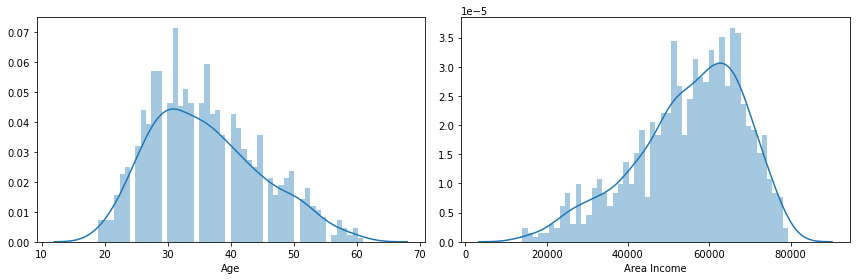

In [6]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(ad_data['Age'], bins=50)
plt.subplot(1,2,2)
sns.distplot(ad_data['Area Income'], bins=50)
plt.tight_layout()

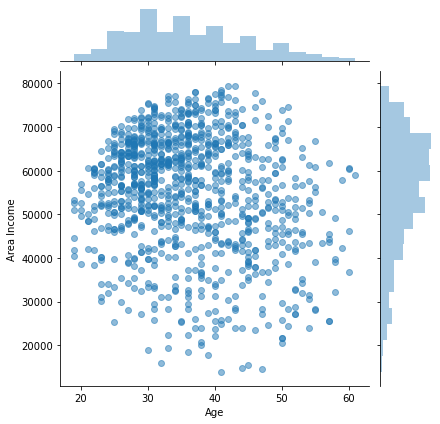

In [7]:
# age vs area income, joint scatter
sns.jointplot(x='Age', y='Area Income', data=ad_data, alpha=0.5)

#### Daily internet usage and time spent on site
In the following plots, we study the relationship between the variables 'daily time spent on site' and 'daily internet usage'. We can see that there are two spikes on both variables. One spike corresponds to higher daily internet usage and the other to medium. In other words most people either use internet a lot (around 230 minutes) or use it an average amount (around 110 minutes). It's the same for 'daily time spent on site', but there are about twice as many people who spend a lot of time on the site (around 80 minutes) than those who spend around 40 minutes.

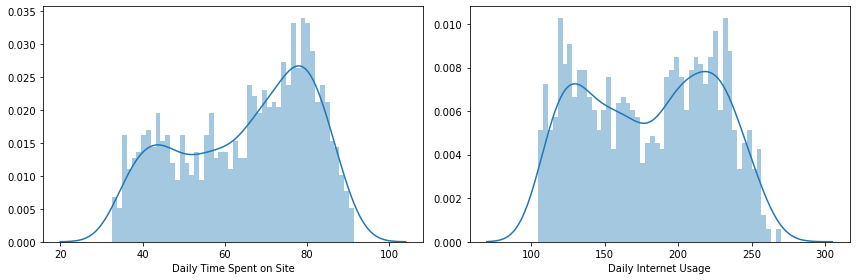

In [8]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(ad_data['Daily Time Spent on Site'], bins=50)
plt.subplot(1,2,2)
sns.distplot(ad_data['Daily Internet Usage'], bins=50)
plt.tight_layout()

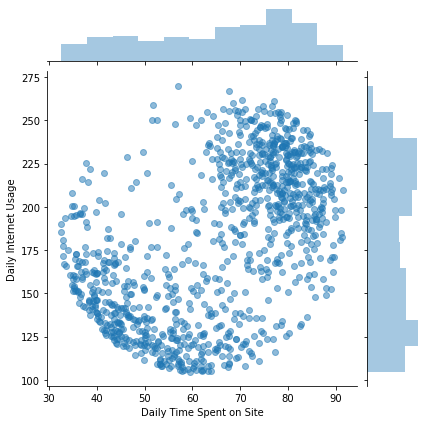

In [9]:
# Area income vs age, joint scatter
sns.jointplot(x='Daily Time Spent on Site',
              y='Daily Internet Usage',
              data=ad_data, 
              alpha=0.5)

### Plots comparing 'Clicked on Ad' profiles
In the following pairplot we see all the variables plotted to each other. Those coloured in red represent people who did not click on the ad and those in blue represent thos who did click on the ad. This information could be useful to rapidly identify the sectors of the population who are more likely to click on our ad in order to better target the ad campaigns. In general, we can identify thatthe following people tend to click on the ad:
- People who spend more time on the website.
- People who with a higher daily internet usage.
- People living in high income areas.
- Young adults (around 20 to 30).

We can also see that men and women click on the ad with the same frequency in general.

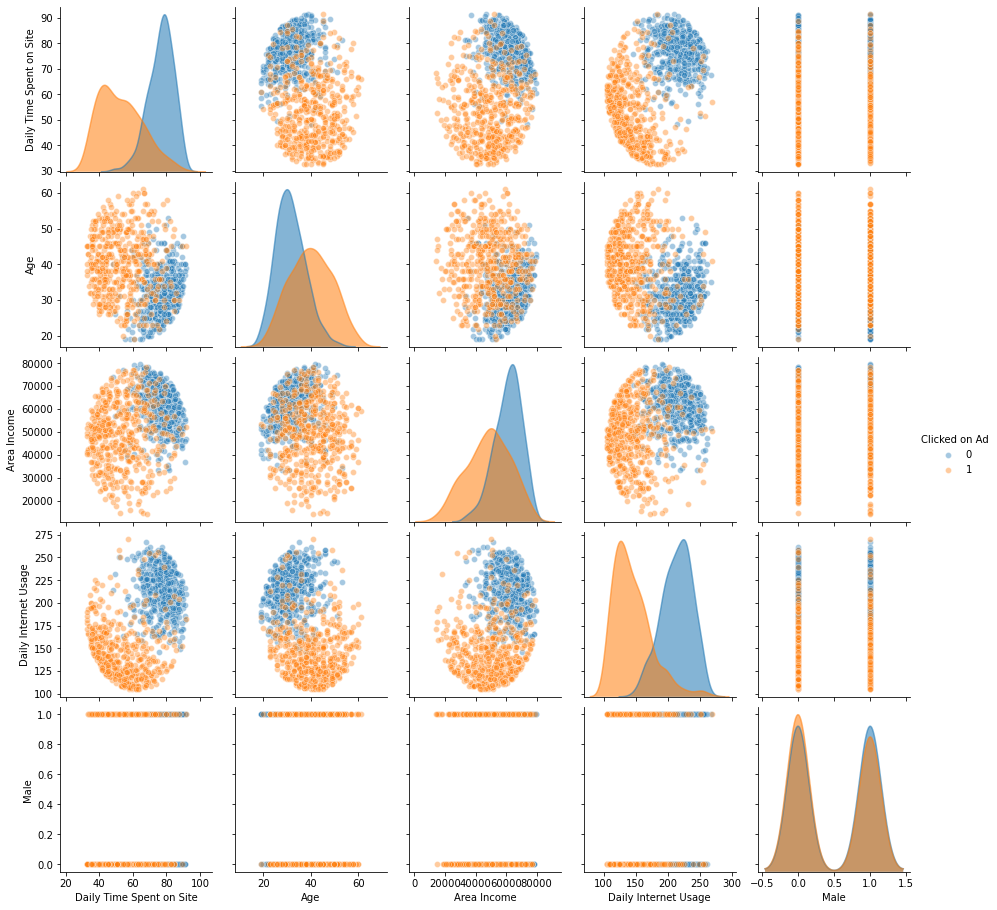

In [18]:
sns.pairplot(ad_data, 
             kind='scatter',
             hue='Clicked on Ad', 
             plot_kws={'alpha':0.4},
             diag_kws={'alpha':0.55}
            )

## Logistic Regression

Let's create a logistic regression model that will predict whether or not a customer will click on the displayed ad. To do that, we use the library SciKit Learn.

#### Splitting the data
Since the logistic regression model takes only numerical values, we isolate only the numerical values. 

In [19]:
# leaving only numerical values
model_data = ad_data
model_data.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1, inplace=True)

In [20]:
# creating training sets
X = model_data.drop('Clicked on Ad', axis=1)
y = model_data['Clicked on Ad']

#### Fitting the data to the model

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/Users/alexAvila/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Predictions and Evaluations
This model predicts whether or not a client with the giver characteristics will click on the add. We already fed the model the training data. Now it's time to test the model's efficacy with data that it has never seen. This data is stored in the variables X_test (for the predictors) and y_test(for the output). We store the predictions in the predictors variable and then test these results against the actual y_test values.

In [23]:
predictions = logmodel.predict(X_test)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
print(pd.DataFrame(confusion_matrix(y_test,predictions),  
                   columns=['Pred. No', 'Pred. Yes'], 
                   index=['Actual No', 'Actual Yes'],
                  ))
print('')
print(classification_report(y_test,predictions))

            Pred. No  Pred. Yes
Actual No        137          2
Actual Yes        16        145

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       139
           1       0.99      0.90      0.94       161

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



## Conclusion

In this project, we were able to identify some characteristics that could make the ad targeting process more efficient for an advertising company. We discovered that users with these characteristics are more likely to click on the ad:
- People who spend more time on the website.
- People who with a higher daily internet usage.
- People living in high income areas.
- Young adults (around 20 to 30).

After that, we trained a model that used logistic regression to determine if a given user will or will not click on the ad. If this model is applied to a marketing campaign, it would be able to predict whether or not a user will clock on the ad before showing the ad itself. This would allow the advertising company to show the ad only to those who will click on it. Such application would significantly decrease advertising expenses for the company and significantly increase their click-through rates.